# The Dataset

The task here is to predict student GPAs. 

Download the following dataset: https://drive.google.com/file/d/14jkgeXF1_0U446EWP1Ee8L8UoJM53TYg/view?usp=sharing

It contains:

*   id--a student's id
*   lat--student's home latittude
*   lon--student's home longitude
*   avg_hours_studided--how many hours this student studied every week on average this semester
*   parents_income--the student's parent's income in dollars.
*   major--the student's major
*   tutoring--whether or not the student received tutoring this semester
*   semester--what semester it is
*   credits--how many credits the student took this semester
*   student_age--how old the student is
*   student_year--what year of college the student is
*   year--what year it is

I am writing an algorithm that, given a set of student information, will predict the student's GPA.



# Introduction

The dataset contains information about students and their information. The following information is collected for each student: ID, latitude and longitude, average hours studied per week, parent’s income, major, tutoring, semester, current credit load, age, and their year in college. The main objective of this project is to develop an algorithm that predicts the GPA of a student given this data. 

One reason that it might be difficult to complete this task is that the dataset contains so many entries and variables. Working with such a complex and large dataset requires significant computational resources. Additionally, having too many variables or features makes it more likely for the model to overfit to the data. Furthermore, the dataset may contain missing values or outliers, which could significantly impact a model’s performance. Thus, it may be necessary to preprocess the data and perform feature engineering prior to building any machine learning model. 

Predicting the GPA of a student could prove to be very useful as educators could leverage this model to identify students who are on track to underperform. By identifying these students early, they can be given support and resources so that they can improve academically. Moreover, educators could use this model to figure out what factors have the most impact on a student’s academic performance.

Overall, although difficult, developing a model that can predict the GPA of a student could prove very useful.


# Data Exploration

I will be exploring each variable. For each column, I am providing information on the min, max, a histogram, and brief speculation about whether or not it will be useful going forward. I am answering the following questions as well:

* Does this school have transfer students?
* What is the median length of attendence at this university?
* Do you think this university has any one credit classes?
* Is grade inflation a problem at this university?
* In what area do you think the Univesrity might be located?
* Does tutoring make a stastically significant difference in grade?
* How often do students switch majors?
* Do different majors have different GPA distributions?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/my_data.csv')

In [78]:
# Transfer Students

transfer = data[data['student_year'] == 'Freshman'].groupby('id').filter(lambda x: x['id'].count() < 2)
print(transfer)

Empty DataFrame
Columns: [Unnamed: 0, id, lat, lon, gpa, avg_hours_studied, parents_income, major, tutoring, semester, year, credits, student_age, student_year]
Index: []


A transfer student is defined as one who doesn't have an ID corresponding to their freshman year. This fact highlights that this student was not attending the university their freshman year, meaning that they transferred to the school during another year. I did not find anyone that fit this criteria, so I do not believe that there are any transfer students in this dataset. 

In [3]:
# Calculate the length of attendance for each student
print(data.groupby('id')['year'].transform(lambda x: x.max() - x.min()).median())

5.0


To calculate the median length of attendace for each student, I first calculated the length of attendance for each individual student. Then, I calculated the median based off of these values. The median length of attendance is 5 years. 

In [4]:
# One Credit Classes
print(data['credits'].value_counts())

9.0     28995
15.0    28973
18.0    28910
12.0    28833
Name: credits, dtype: int64


Since the unique values that the total number of credits can take are multiples of 3 (9, 12, 15, 18), the university most likely does not offer 1 credit courses.

In [5]:
# Grade Inflation
print(data['gpa'].describe())

count    278217.000000
mean          3.559093
std           0.606916
min           0.000000
25%           3.210000
50%           3.880000
75%           4.000000
max           4.100000
Name: gpa, dtype: float64


Yes, there is a grade inflation problem in this university. The mean GPA is 3.56, which suggests that on average, students are receiving high grades. In addition, the median GPA, which is less susceptible to outliers compared to the mean, is 3.88, which is quite high. 

In [119]:
# University Location
from sklearn.cluster import KMeans
import numpy as np
from geopy.geocoders import Nominatim

data = pd.read_csv('/content/my_data.csv')

coordinates = data[['lat', 'lon']]

# Define the number of clusters
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(coordinates)

# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Count the number of points in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Find the index of the cluster with the most points
max_count_index = np.argmax(counts)


# Get the center coordinates of the cluster with the most points
center = kmeans.cluster_centers_[max_count_index]

print(f"Center of the cluster with the most points: Latitude={center[0]}, Longitude={center[1]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


max count: 1
Center of the cluster with the most points: Latitude=39.10454748627982, Longitude=-76.8127896465015


I used K-means clustering to figure out the area with the most points, which is most likely where the in-state students and the university are. In this case, the latitude and longitude lines up with Maryland. Thus, Maryland is the state where the university is located.

In [8]:
# Does tutoring make a stastically significant difference in grade?
tutoring_group = data[data['tutoring'] == 'Yes']
non_tutoring_group = data[data['tutoring'] == 'No']

In [9]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(tutoring_group['gpa'], non_tutoring_group['gpa'], equal_var=False)

alpha = 0.05
 
if p_value < alpha:
    print("There is a statistically significant difference in grades between the tutoring and non-tutoring groups.")
else:
    print("There is no statistically significant difference in grades between the tutoring and non-tutoring groups.")

There is a statistically significant difference in grades between the tutoring and non-tutoring groups.


The T-Test indicates that there is indeed a statistically significant difference in grades between those who receive tutoring and those who don't receive tutoring.

In [37]:
# How often do students switch majors?
switched_majors = sum(data.groupby('id')['major'].nunique() > 1)
total_students = len(data['id'].unique())
print("Number of Students Switching Majors: ", switched_majors)
print("Total Number of Students: ", total_students)

print(f"The percentage of students who have switched majors is: {(switched_majors/total_students)*100:.2f}%")

Number of Students Switching Majors:  6785
Total Number of Students:  100000
The percentage of students who have switched majors is: 6.78%


Students do not switch majors very often as only 6.78% of students have switched majors. 

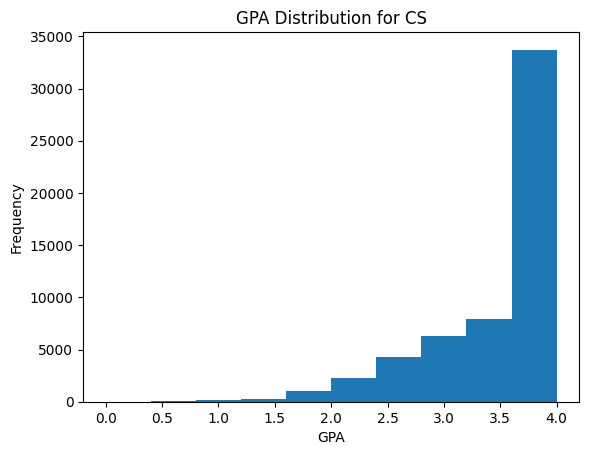

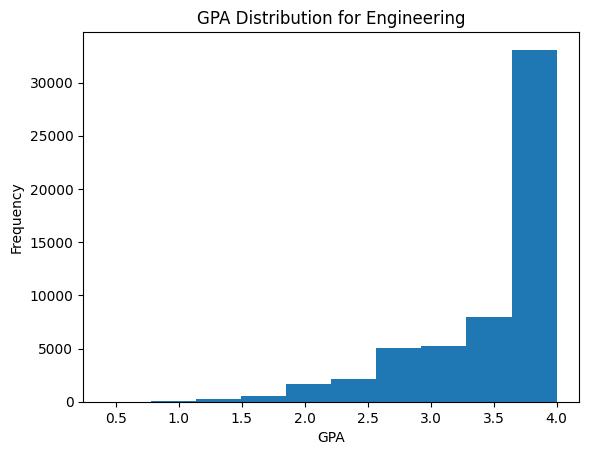

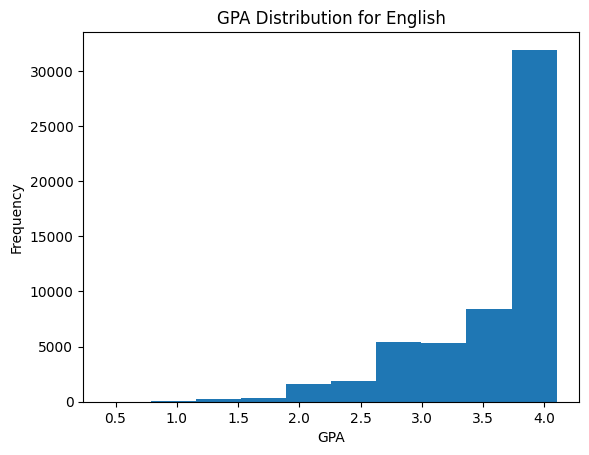

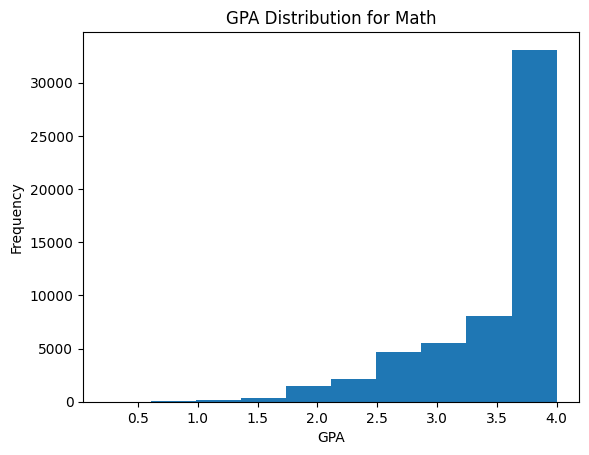

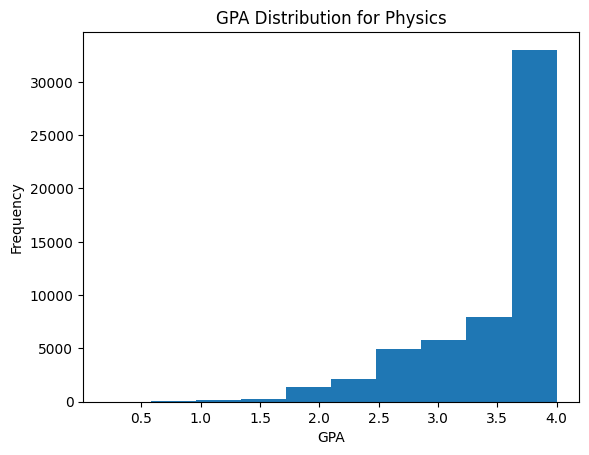

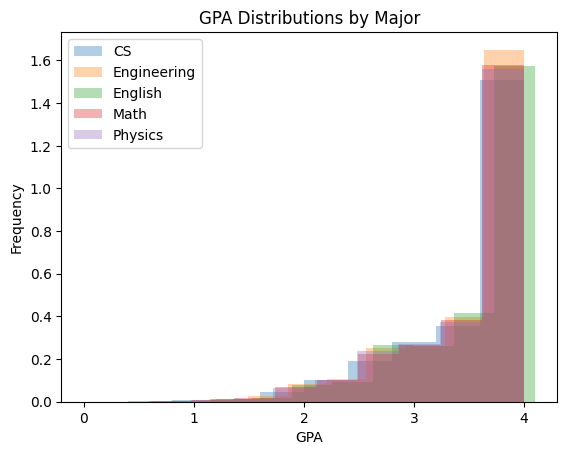

In [37]:
# Do different majors have different GPA distributions?
grouped_by_major = data.groupby('major')

# Create a histogram for the GPA distribution of each major
for i, (major, group) in enumerate(grouped_by_major):
  plt.hist(data[data['major'] == major]['gpa'])
  plt.xlabel('GPA')
  plt.ylabel('Frequency')
  plt.title('GPA Distribution for ' + major)
  plt.show()


# Plot 1 graph for all majors
for major, group in grouped_by_major:
    plt.hist(group['gpa'], alpha=0.35, label=major, density=True)

plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distributions by Major')
plt.legend()
plt.show()

Although the distributions are pretty similar, the different majors do indeed have slightly different distributions. This is especially apparent in the last graph with the title "GPA Distributions by Major," which compares all the major distributions in one graph.

In [39]:
# Get a list of the different columns
columns_list = data.columns.tolist()

# Print the list of all the columns
print(columns_list)

['Unnamed: 0', 'id', 'lat', 'lon', 'gpa', 'avg_hours_studied', 'parents_income', 'major', 'tutoring', 'semester', 'year', 'credits', 'student_age', 'student_year']


Unnamed: 0
Minimum value: 0
Maximum value: 278216


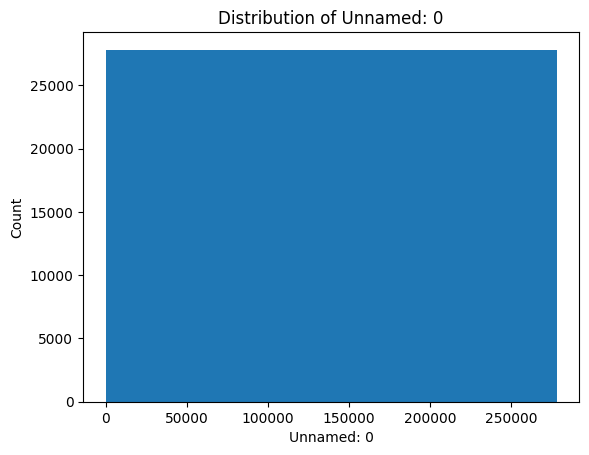

The Unnamed: 0 column simply represents the row indices of the Pandas DataFrame.
Thus, this column will not be useful going forward as it doesn't have anything to do with the dataset of students itself.


In [54]:
### Exploring Unnamed: 0

print("Unnamed: 0")
print("Minimum value:", data['Unnamed: 0'].min())
print("Maximum value:", data['Unnamed: 0'].max())
plt.hist(data['Unnamed: 0'])
plt.xlabel('Unnamed: 0')
plt.ylabel('Count')
plt.title('Distribution of Unnamed: 0')
plt.show()
print("The Unnamed: 0 column simply represents the row indices of the Pandas DataFrame.")
print("Thus, this column will not be useful going forward as it doesn't have anything to do with the dataset of students itself.")

ID
Minimum value: 13251.0
Maximum value: 41072.0


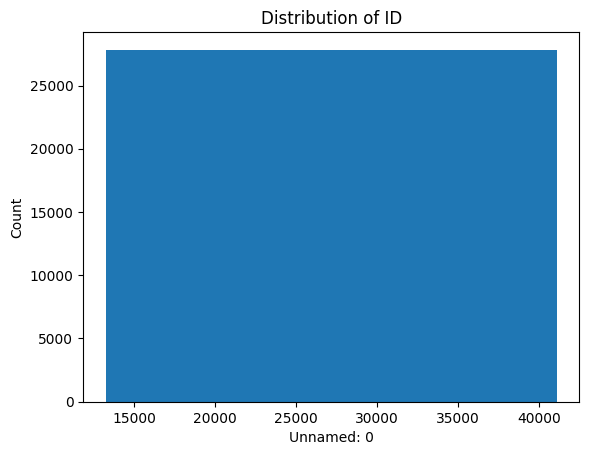

The ID will not be useful going foward. The ID column simply serves as an identifier
for each row and helps distinguish between students in the dataset. However, this information
does not provide much insight related to a student's GPA. Basically, the ID's do not
provide meaningful information to the model.


In [55]:
### Exploring ID

print("ID")
print("Minimum value:", data['id'].min())
print("Maximum value:", data['id'].max())
plt.hist(data['id'])
plt.xlabel('ID')
plt.ylabel('Count')
plt.title('Distribution of ID')
plt.show()
print("The ID will not be useful going foward. The ID column simply serves as an identifier")
print("for each row and helps distinguish between students in the dataset. However, this information")
print("does not provide much insight related to a student's GPA. Basically, the ID's do not")
print("provide meaningful information to the model.")

Lat:
Minimum value: 32.0488456300597
Maximum value: 40.12604018179998


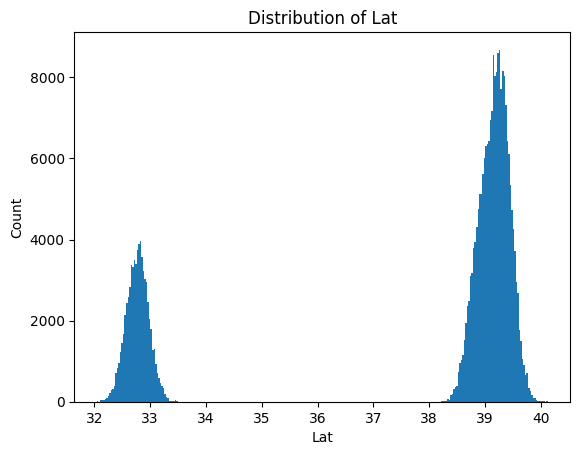

Latitude will be useful going forward. Latitude can capture regional factors that may influence academic performance.
For instance, some geographic locations may provide better resources, and thus, can impact academic performance


In [65]:
### Lat

print("Lat:")
print("Minimum value:", data['lat'].min())
print("Maximum value:", data['lat'].max())
plt.hist(data['lat'], bins='auto')
plt.xlabel('Lat')
plt.ylabel('Count')
plt.title('Distribution of Lat')
plt.show()
print("Latitude will be useful going forward. Latitude can capture regional factors that may influence academic performance.")
print("For instance, some geographic locations may provide better resources, and thus, can impact academic performance")

Lon:
Minimum value: -94.67394393538213
Maximum value: -75.91129483734409


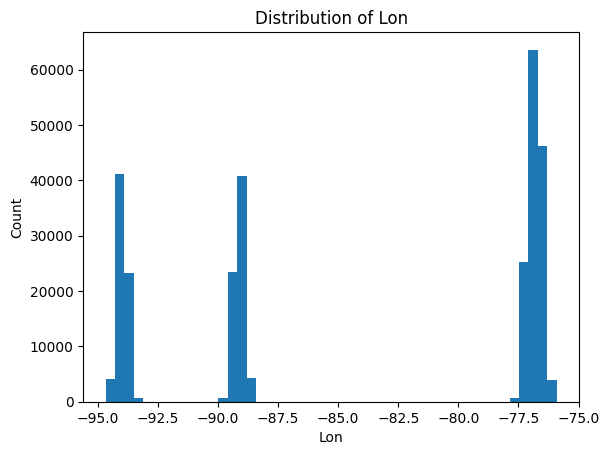

Latitude will be useful going forward. Similar to latitude, longitude can capture regional factors that
may influence academic performance.


In [66]:
### Lon

print("Lon:")
print("Minimum value:", data['lon'].min())
print("Maximum value:", data['lon'].max())
plt.hist(data['lon'], bins='auto')
plt.xlabel('Lon')
plt.ylabel('Count')
plt.title('Distribution of Lon')
plt.show()
print("Latitude will be useful going forward. Similar to latitude, longitude can capture regional factors that")
print("may influence academic performance.")

GPA:
Minimum value: 0.0
Maximum value: 4.1


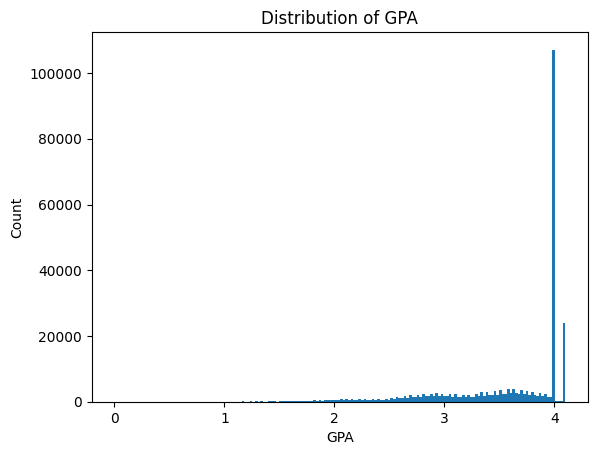

GPA will be highly relevant going forward. The GPA represents the variable that needs to be predicted. This variable
provides a lot of meaningful information to the model.


In [67]:
### GPA

print("GPA:")
print("Minimum value:", data['gpa'].min())
print("Maximum value:", data['gpa'].max())
plt.hist(data['gpa'], bins='auto')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.title('Distribution of GPA')
plt.show()
print("GPA will be highly relevant going forward. The GPA represents the variable that needs to be predicted. This variable")
print("provides a lot of meaningful information to the model.")

Average Hours Studied:
Minimum value: 0.0
Maximum value: 10000.0


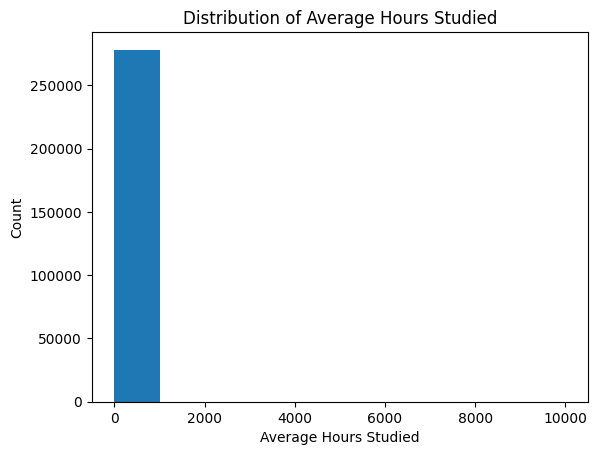

Average Hours Studied will be very useful going forward. This variable indicates the amount
of time students study, which is a significant factor influencing their performance in academics
This variable heavily impacts GPA, so it will be useful.


In [69]:
### Avg_hours_studied
print("Average Hours Studied:")
print("Minimum value:", data['avg_hours_studied'].min())
print("Maximum value:", data['avg_hours_studied'].max())
plt.hist(data['avg_hours_studied'])
plt.xlabel('Average Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Average Hours Studied')
plt.show()
print("Average Hours Studied will be very useful going forward. This variable indicates the amount")
print("of time students study, which is a significant factor influencing their performance in academics")
print("This variable heavily impacts GPA, so it will be useful.")

Parents Income:
Minimum value: 21791.00923379891
Maximum value: 184536.19320456748


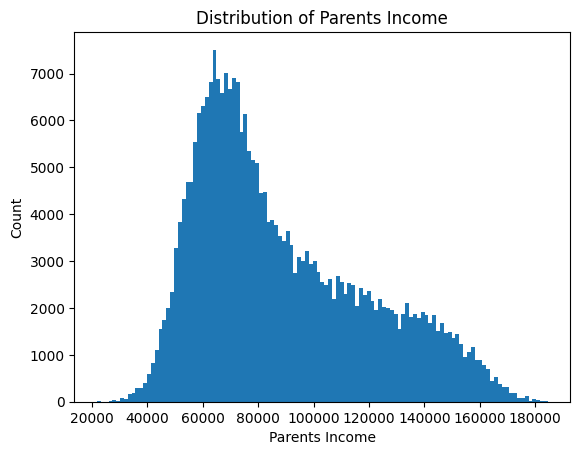

Parents Income will be very useful going forward. The socioecnomic background of a student
influences a student's access to educational resources such as tutoring and educational materials, 
which impacts academic performance. Because of its impact on GPA, parent's income will be useful.


In [70]:
### Parents Income
print("Parents Income:")
print("Minimum value:", data['parents_income'].min())
print("Maximum value:", data['parents_income'].max())
plt.hist(data['parents_income'], bins='auto')
plt.xlabel('Parents Income')
plt.ylabel('Count')
plt.title('Distribution of Parents Income')
plt.show()
print("Parents Income will be very useful going forward. The socioecnomic background of a student")
print("influences a student's access to educational resources such as tutoring and educational materials, ")
print("which impacts academic performance. Because of its impact on GPA, parent's income will be useful.")

Major:
Minimum value: English
Maximum value: Physics


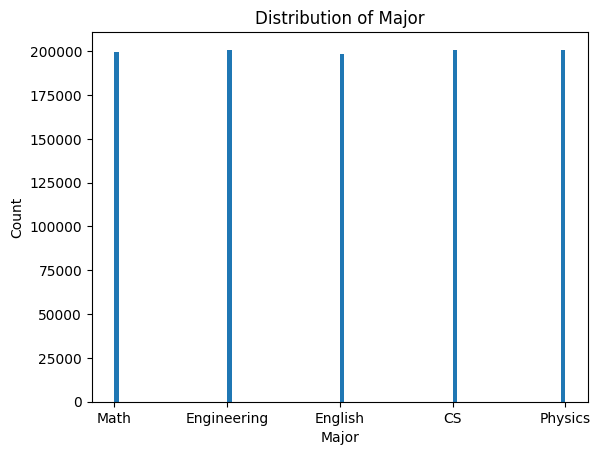

Major will be useful going forward. The major a student chooses can potentially have an impact on their
academic performance and GPA. Different majors may have different levels of difficulty, grading standards,
or coursework requirements, which can influence a student's GPA. Including the major as a feature in the
model allows the model to capture any potential relationship between the major and GPA.


In [18]:
###Major
count = data['major'].value_counts()
print("Major:")
print("Minimum value:", count.idxmin())
print("Maximum value:", count.idxmax())
plt.hist(data['major'].astype("str"), bins='auto')
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Distribution of Major')
plt.show()
print("Major will be useful going forward. The major a student chooses can potentially have an impact on their")
print("academic performance and GPA. Different majors may have different levels of difficulty, grading standards,")
print("or coursework requirements, which can influence a student's GPA. Including the major as a feature in the")
print("model allows the model to capture any potential relationship between the major and GPA.")

Tutoring:
Minimum value: Yes
Maximum value: No


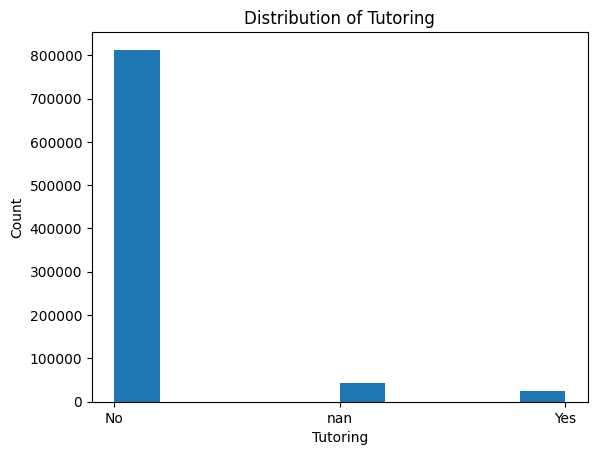

Tutoring will be useful going forward. Tutoring can have an impact on a student's academic performance.
Because tutoring can impact the GPA, the model should take it into account.


In [5]:
###Tutoring
count = data['tutoring'].value_counts()

print("Tutoring:")
print("Minimum value:", count.idxmin())
print("Maximum value:", count.idxmax())
plt.hist(data['tutoring'].astype("str"))
plt.xlabel('Tutoring')
plt.ylabel('Count')
plt.title('Distribution of Tutoring')
plt.show()
print("Tutoring will be useful going forward. Tutoring can have an impact on a student's academic performance.")
print("Because tutoring can impact the GPA, the model should take it into account.")

Fall      500000
Spring    500000
Name: semester, dtype: int64
Semester:
Minimum value: none because the counts for both semesters are the same
Maximum value: none because the counts for both semesters are the same


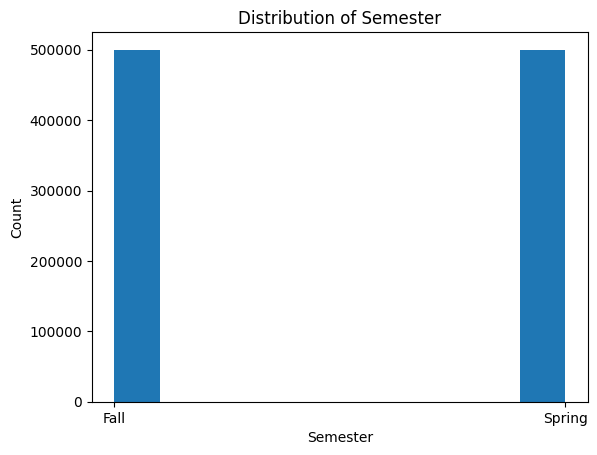

The semester that a student is enrolled in does not have a strong correlation with GPA.
Thus, because it does not impact academic performance directly, it will not be useful.


In [20]:
### Semester
count = data['semester'].value_counts()
print(count)
print("Semester:")
print("Minimum value: none because the counts for both semesters are the same")
print("Maximum value: none because the counts for both semesters are the same")
plt.hist(data['semester'].astype('str'))
plt.xlabel('Semester')
plt.ylabel('Count')
plt.title('Distribution of Semester')
plt.show()
print("The semester that a student is enrolled in does not have a strong correlation with GPA.")
print("Thus, because it does not impact academic performance directly, it will not be useful.")

Year:
Minimum value: 2005
Maximum value: 2025


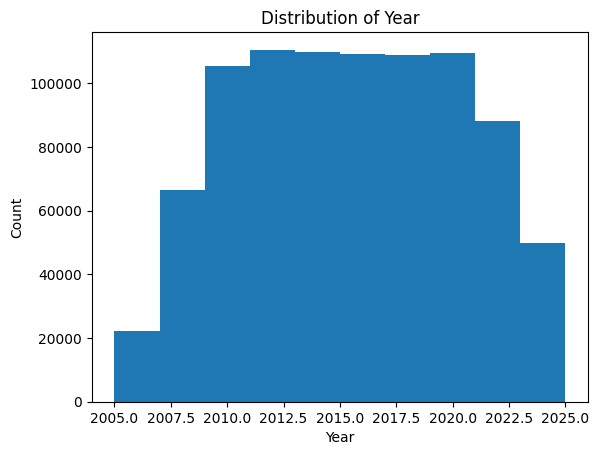

Year will be useful going forward. The year column can capture certain temporal effects or trends that might be associated with a student's GPA.
For example, if there have been significant changes in the educational system or curriculum over the
years, it could indirectly influence students' academic performance. In such cases, the year column
could serve as a proxy for capturing these underlying temporal factors.


In [8]:
### Year
print("Year:")
print("Minimum value:", data['year'].min())
print("Maximum value:", data['year'].max())
plt.hist(data['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()
print("Year will be useful going forward. The year column can capture certain temporal effects or trends that might be associated with a student's GPA.")
print("For example, if there have been significant changes in the educational system or curriculum over the")
print("years, it could indirectly influence students' academic performance. In such cases, the year column")
print("could serve as a proxy for capturing these underlying temporal factors.")

Credits:
Minimum value: 9
Maximum value: 18


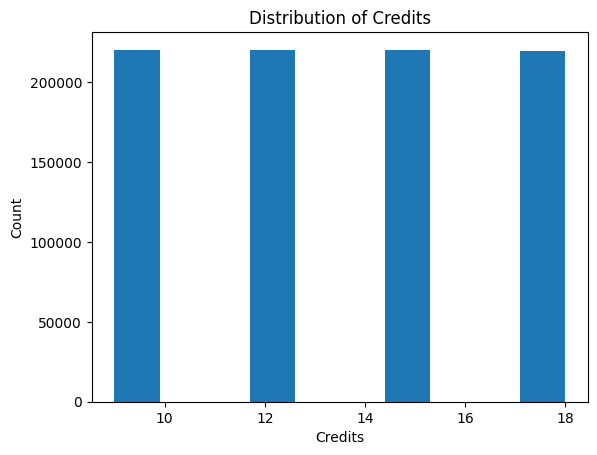

In the context of training a model to predict the GPA of a student, the credits column will be useful.
The number of credits a student takes in a semester or academic year can provide valuable information about their
academic workload and the level of difficulty of their courses.


In [7]:
### Credits
print("Credits:")
print("Minimum value:", data['credits'].min())
print("Maximum value:", data['credits'].max())
plt.hist(data['credits'])
plt.xlabel('Credits')
plt.ylabel('Count')
plt.title('Distribution of Credits')
plt.show()
print("In the context of training a model to predict the GPA of a student, the credits column will be useful.")
print("The number of credits a student takes in a semester or academic year can provide valuable information about their")
print("academic workload and the level of difficulty of their courses.")

Student Age:
Minimum value: 17
Maximum value: 33


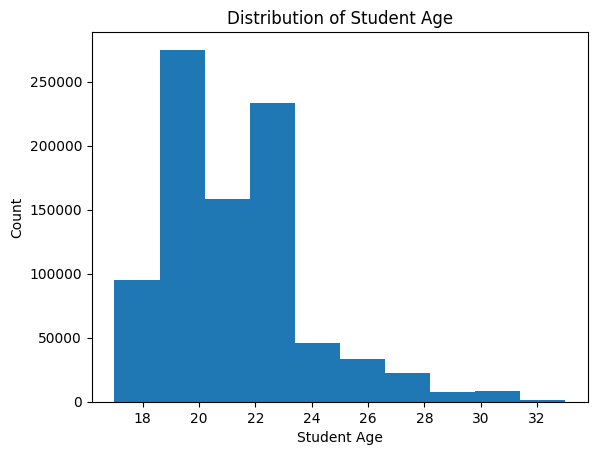

Student Age will be useful going forward. Different age groups may have different
learning abilities, which directly impacts academic performance. Because this variable
highly impacts GPA, it will be useful.


In [9]:
### Student Age
print("Student Age:")
print("Minimum value:", data['student_age'].min())
print("Maximum value:", data['student_age'].max())
plt.hist(data['student_age'])
plt.xlabel('Student Age')
plt.ylabel('Count')
plt.title('Distribution of Student Age')
plt.show()
print("Student Age will be useful going forward. Different age groups may have different")
print("learning abilities, which directly impacts academic performance. Because this variable")
print("highly impacts GPA, it will be useful.")

Senior      400000
Freshman    200000
Sophmore    200000
Junior      200000
Name: student_year, dtype: int64
Student Year:
Minimum value: Freshman, Sophomore, and Junior all have the same minimum count
Maximum value: Senior


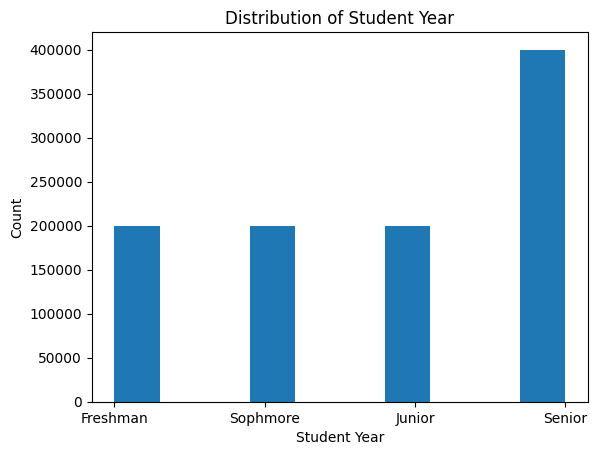

Student Year will be useful going forward. Different student years have different benefits.
For instance, a freshman can have easier courses because they are lower level. In addition,
freshman may have academic support that seniors don't have. Thus, because this variable
impacts academic performance and GPA, it will be useful.


In [25]:
###Student Year
count = data['student_year'].value_counts()
print(count)
print("Student Year:")
print("Minimum value: Freshman, Sophomore, and Junior all have the same minimum count")
print("Maximum value:", count.idxmax())
plt.hist(data['student_year'])
plt.xlabel('Student Year')
plt.ylabel('Count')
plt.title('Distribution of Student Year')
plt.show()
print("Student Year will be useful going forward. Different student years have different benefits.")
print("For instance, a freshman can have easier courses because they are lower level. In addition,")
print("freshman may have academic support that seniors don't have. Thus, because this variable")
print("impacts academic performance and GPA, it will be useful.")

# Data Cleaning
I have to deal with outliers and missing data. I also one-hot encode any variables that I needed to encode. I also figured out how to handle the latitude and longitude, and wrote.

In [14]:
import pandas as pd

temp = pd.read_csv('/content/my_data.csv')

# Dealing with outliers
print(len(temp[temp['avg_hours_studied'] == 10000]))
temp = temp[temp['avg_hours_studied'] != 10000]

102


These outliers (10000 hours) is not representative of the actual data. They do not reflect the actual distribution of the data. Removing these outliers helps maintain the integrity of the dataset. Additionally, because there are only 102 of these outliers, not much data is being lost as the dataset is so large.

In [15]:
# Dealing with Missing Data 
temp['tutoring'] = temp['tutoring'].fillna('Unknown')

The "tutoring" column is a categorical variable that likely indicates whether a student received tutoring or not. By filling the empty spaces with "unknown," those instances where the tutoring information is missing are explicity identified. This maintains the categorical nature of the variable and allows for meaningful analysis based on the presence or absence of tutoring. This technique is known as imputation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

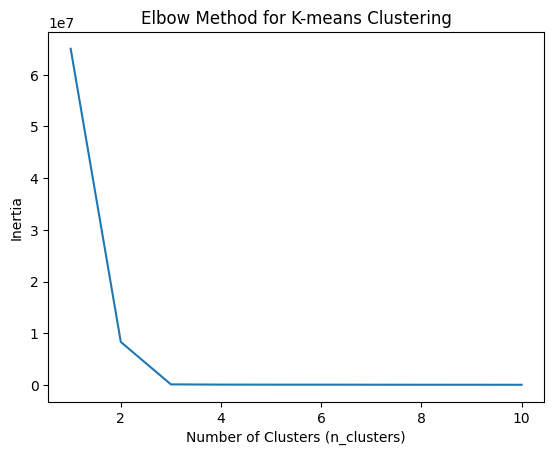

In [16]:
# Performing Elbow Method for K means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

lat_lon_data = temp[['lat', 'lon']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(lat_lon_data)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt

# Plot the inertia values
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means Clustering')
plt.show()

The Elbow method is being used to find the optimal value of the K for the K-Means algorithm.

In [17]:
# Dealing with latitude and longitude

# Combine latitude and longitude into a new feature
temp['location'] = list(zip(temp['lat'], temp['lon']))

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
temp['location_cluster'] = kmeans.fit_predict(temp['location'].tolist())

print(len(temp.loc[temp['location_cluster'] == 0]))
print(len(temp.loc[temp['location_cluster'] == 1]))
print(len(temp.loc[temp['location_cluster'] == 2]))

temp.drop('location', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


500838
250369
248691


I’ll deal with the latitude and longitude by using K-Means Clustering. Locations that are geographically close to each other tend to have similar latitude and longitude values. K-means clustering can capture these patterns by grouping nearby locations into the same cluster.

In [18]:
# Dropping the columns that are obsolete now or I previously stated would not be useful
temp.drop('lat', axis=1, inplace=True)
temp.drop('lon', axis=1, inplace=True)
temp.drop('semester', axis=1, inplace=True)
temp.drop('id', axis=1, inplace=True)
temp.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
#One hot encode the columns
categorical_columns = temp.select_dtypes(include=['object', 'category']).columns
data_encoded = pd.get_dummies(temp, columns=categorical_columns)

In [20]:
data_encoded.head()

,gpa,avg_hours_studied,parents_income,year,credits,student_age,location_cluster,major_CS,major_Engineering,major_English,major_Math,major_Physics,tutoring_No,tutoring_Unknown,tutoring_Yes,student_year_Freshman,student_year_Junior,student_year_Senior,student_year_Sophmore
0,3.64,5,68628.72693,2007,15,26,0,0,0,0,1,0,1,0,0,1,0,0,0
1,3.65,5,68628.72693,2008,15,27,0,0,0,0,1,0,1,0,0,1,0,0,0
2,4.00,5,68628.72693,2008,9,27,0,0,0,0,1,0,1,0,0,0,0,0,1
3,4.00,4,68628.72693,2009,9,28,0,0,0,0,1,0,1,0,0,0,0,0,1
4,3.30,4,68628.72693,2009,18,28,0,0,0,0,1,0,1,0,0,0,1,0,0


# Evaluation

One interesting part about evaluating this problem is that GPA is a continuous variable, so accuracy score should not be used as the evaluation metric. Rather, this problem is a regression problem, so evaluation metrics for regression should be used. In this case, I used Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-Squared Error (R2). 

MSE measures the average squared difference between the predicted GPA values and the actual GPA values. It provides an overall measure of the model's accuracy, with lower values indicating better performance. However, MSE is sensitive to outliers and places more emphasis on larger errors.

RMSE is the square root of MSE and provides a more interpretable measure of the average prediction error in the same unit as the target variable (GPA in this case). Like MSE, lower RMSE values indicate better model performance.

R2 represents the proportion of the variance in the target variable (GPA) that is explained by the model. It ranges from 0 to 1, where higher values indicate a better fit to the data. R2 provides insights into how well the model captures the variation in the GPA and serves as a measure of goodness-of-fit.

Overall, MSE and RMSE provide insights into the average prediction error, while R2 indicates the proportion of variance explained by the model. These metrics collectively capture the accuracy, precision, and goodness-of-fit aspects of the models, allowing for a comprehensive evaluation of their performance in predicting the GPA of students.

In addition to the evaluation metrics mentioned earlier, the evaluation process should also involve splitting the dataset into training and testing sets. The train-test split is crucial for assessing the model's performance on unseen data and gauging its ability to generalize. The training set is used to train the model on the available data, while the testing set is used to assess how well the trained model performs on new, unseen data.

# Modeling

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'X' as the input features and 'y' as the target variable
y = data_encoded['gpa']
X = data_encoded.drop('gpa', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [35]:
# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R2) Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.32
R-squared (R2) Score: 0.72


The Random Forest Regressor can capture complex nonlinear relationships between input features and the target variable. Since factors influencing GPA may have nonlinear relationships, such as the number of hours studied or previous academic performance, the Random Forest Regressor can capture these nuances. The Random Forest Regressor is also robust to oise due to its ensemble nature. It averages predictions from multiple trees, reducing the impact of individual noise. The number of estimators determines the number of decision trees in the random forest. A higher number of estimators increases the model's complexity and its ability to capture intricate relationships in the data. In this case, 100 estimators provides a good balance between model performance and computational efficiency. Random_state sets the random seed for reproducibility. By fixing the random state to 42, the same random patterns will be generated each time the model is trained

In [145]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R2) Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R2) Score: 0.55


Linear Regression is a suitable model for predicting the GPA of students due to its simplicity and ability to capture linear relationships between the input features and the target variable. For instance, it may capture the relationship between number of hours studied and GPA. With regards to the hyperparameters, the default hyperparameters did not need more tuning as they provided the correct starting point.

In [11]:
#K Neighbors Regressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regressor model
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R2) Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.31
R-squared (R2) Score: 0.73


The KNeighborsRegressor model is a suitable choice for predicting the GPA in this task. GPA prediction can benefit from a nearest neighbor approach because students with similar characteristics and academic patterns are likely to have similar GPAs. By considering the k nearest neighbors, the model can capture the local patterns and tendencies within the dataset, allowing it to make informed predictions. KNeighborsRegressor is also a flexible model that can capture non-linear relationships between the input features and the target variable. The n_neighbors parameter determines the number of neighbors to consider when making predictions. In this case, setting it to 5 is a reasonable choice. A higher number of neighbors can provide smoother predictions, while a lower number can make the model more sensitive to noise. By selecting 5 neighbors, we strike a balance between capturing sufficient local patterns and avoiding excessive noise sensitivity. 

# Conclusion


In this task, I applied three regression models, namely Random Forest Regressor, Linear Regression, and KNeighborsRegressor, to predict the GPA of students. We evaluated the models using different metrics to assess their performance.

The results obtained are as follows:

**Random Forest Regressor:**

Mean Squared Error (MSE): 0.1046

Root Mean Squared Error (RMSE): 0.3235

R-squared (R2) Score: 0.7160

**Linear Regression:**

Mean Squared Error (MSE): 0.17

Root Mean Squared Error (RMSE): 0.41

R-squared (R2) Score: 0.55

**KNeighborsRegressor:**

Mean Squared Error (MSE): 0.10

Root Mean Squared Error (RMSE): 0.31

R-squared (R2) Score: 0.73

Based on these results, the KNeighborsRegressor model achieved the lowest MSE and RMSE, indicating better performance in terms of predicting the GPA compared to the other models. Additionally, it obtained the highest R-squared score, suggesting that it explains more of the variance in the GPA compared to the other models. The Random Forest Regressor also performed reasonably well, while the Linear Regression model showed slightly weaker performance.

Overall, considering the metrics and the task at hand, the KNeighborsRegressor model can be considered relatively successful in predicting the GPA of students. However, it is important to note that the predictive accuracy might still have room for improvement, as the RMSE values indicate some level of error in the predictions.

To further enhance the model's performance, additional data could be useful. Some potential data that could be considered include: information about the students' study habits and time management skills, data on extracurricular activities, psychological factors such as stress levels, and more detailed information about the courses taken and workload.

By incorporating such data, the model may gain more insights and potentially improve its predictive capabilities. Additionally, conducting further model evaluation and validation with new data would be important to ensure the model's effectiveness in different settings and student populations.